In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/text-dataset-for-text-emotion-detection/text.txt


In [2]:
f=open(r"/kaggle/input/text-dataset-for-text-emotion-detection/text.txt","r")
data=f.read()
f.close()

In [3]:
ds=[]
for d in data.split("\n"):
    ds.append(d.split("] "))

In [4]:
import nltk
import string

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def preprocess_text(text):
    text = text.lower()  
    tokens = word_tokenize(text) 
    tokens = [word for word in tokens if word not in string.punctuation]  
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [6]:
target=['joy','fear','anger','sadness','disgust','shame','guilt']
for i in range(len(ds)):
    tar=[]
    for v in ds[i][0]:
        if v.isdecimal():
            tar.append(float(v))
    ds[i][0]=tar
print(ds[:5])


[[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'During the period of falling in love, each time that we met and especially when we had not met for a long time.'], [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'When I was involved in a traffic accident.'], [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'When I was driving home after  several days of hard work, there was a motorist ahead of me who was driving at 50 km/hour and refused, despite his low speeed to let me overtake.'], [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'When I lost the person who meant the most to me.'], [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], "The time I knocked a deer down - the sight of the animal's injuries and helplessness.  The realization that the animal was so badly hurt that it had to be put down, and when the animal screamed at the moment of death."]]


In [7]:
X,y=[],[]
for v in ds:
    if len(v)!=2:
        print(v)
        continue
    X.append(preprocess_text(v[1]))
    y.append(v[0])

[[]]


In [8]:
len(X),len(y)
y[7].index(1)

0

In [9]:
labels = []
for v in y:
    labels.append(target[v.index(1)])
labels

['joy',
 'fear',
 'anger',
 'sadness',
 'disgust',
 'shame',
 'guilt',
 'joy',
 'fear',
 'anger',
 'sadness',
 'disgust',
 'shame',
 'guilt',
 'joy',
 'fear',
 'anger',
 'sadness',
 'disgust',
 'shame',
 'guilt',
 'joy',
 'fear',
 'anger',
 'sadness',
 'disgust',
 'shame',
 'guilt',
 'joy',
 'fear',
 'anger',
 'sadness',
 'disgust',
 'shame',
 'guilt',
 'joy',
 'fear',
 'anger',
 'sadness',
 'disgust',
 'shame',
 'guilt',
 'joy',
 'fear',
 'anger',
 'sadness',
 'disgust',
 'shame',
 'guilt',
 'joy',
 'fear',
 'anger',
 'sadness',
 'disgust',
 'shame',
 'guilt',
 'joy',
 'fear',
 'anger',
 'sadness',
 'disgust',
 'shame',
 'guilt',
 'joy',
 'fear',
 'anger',
 'sadness',
 'disgust',
 'shame',
 'guilt',
 'joy',
 'fear',
 'anger',
 'sadness',
 'disgust',
 'shame',
 'guilt',
 'joy',
 'fear',
 'anger',
 'sadness',
 'disgust',
 'shame',
 'guilt',
 'joy',
 'fear',
 'anger',
 'sadness',
 'disgust',
 'shame',
 'guilt',
 'joy',
 'fear',
 'anger',
 'sadness',
 'disgust',
 'shame',
 'guilt',
 'joy'

<Axes: >

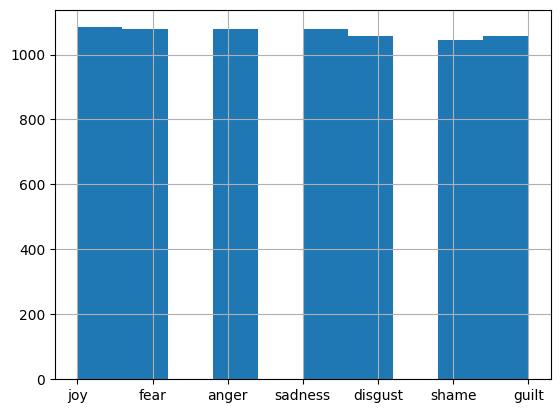

In [10]:
df = pd.DataFrame(data=X)
df.rename({0:"content"},axis=1,inplace=True)
df['labels']=labels
df['labels'].hist()

In [11]:
df['labels'].value_counts()

labels
joy        1084
anger      1080
sadness    1079
fear       1078
disgust    1057
guilt      1057
shame      1045
Name: count, dtype: int64

In [12]:
nums = [v.index(1) for v in y]

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_mod = tfidf.fit_transform(X)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_mod,nums,test_size=0.4,random_state=42)
lr = LogisticRegression()
svm = SVC()
mnb = MultinomialNB()

In [15]:
lr.fit(X_train,y_train)

LogisticRegression()

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(lr.predict(X_test),y_test),accuracy_score(lr.predict(X_train),y_train)

(0.5584893048128342, 0.8676470588235294)

In [17]:
svm.fit(X_train,y_train)

SVC()

In [18]:
accuracy_score(svm.predict(X_test),y_test)

0.5481283422459893

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
accuracy_score(dt.predict(X_test),y_test),accuracy_score(dt.predict(X_train),y_train)

(0.4769385026737968, 0.9975490196078431)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
accuracy_score(rf.predict(X_test),y_test),accuracy_score(rf.predict(X_train),y_train)

(0.535427807486631, 0.9975490196078431)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(rf.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       631
           1       1.00      1.00      1.00       655
           2       1.00      1.00      1.00       644
           3       1.00      1.00      1.00       625
           4       1.00      1.00      1.00       650
           5       1.00      0.99      0.99       647
           6       1.00      1.00      1.00       636

    accuracy                           1.00      4488
   macro avg       1.00      1.00      1.00      4488
weighted avg       1.00      1.00      1.00      4488



In [24]:
print(classification_report(rf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       511
           1       0.67      0.58      0.62       487
           2       0.42      0.43      0.43       430
           3       0.53      0.63      0.58       382
           4       0.59      0.53      0.56       452
           5       0.44      0.49      0.46       368
           6       0.42      0.48      0.45       362

    accuracy                           0.54      2992
   macro avg       0.53      0.53      0.53      2992
weighted avg       0.55      0.54      0.54      2992

